# Euler Bernoulli Beam Theory
## Example:  Euler-Bernoulli beam theory for a heterogeneous anisotropic (lamellar) rod

### Formulation:

$L[u(x)] = f(x) \qquad x \in [0,10]$

$L[u(x)] = EI u_{xxxx} = f(x)$

EI is a material/geometry hybrid parameter called flexural rigidity. EI varies spatially as a lamellar composite, with lamellae oriented perpendicular to the $x$ axis. There are three different components in the material, yielding three distinct material property parameters in the domain $x\in[0,10]$.

$
EI = p(x) =
\begin{cases}
    100,  & 0 \leq x \lt 2, \\
    25, & 2 \leq x \lt 4, \\
    100,  & 4 \leq x \lt 6, \\
    50, & 6 \leq x \lt 8, \\
    25,  & 8 \leq x \leq 10
\end{cases}
$


### Forcing Library
I = {0.01, 0.03, 0.05, 0.07, 0.09}

J = {0.2, 0.4, 0.6, 0.8, 1.0}

K = {0.01, 0.03, 0.05, 0.07, 0.09}

F = {$f_j(i_a, j_b, k_c): i_a*sin(j_b*x)+k_c), i_a*cos(j_b*x+0.5)+k_c)$}, $\; \forall \; i_a \in I, j_b \in J, k_c \in K$


In [1]:
%load_ext autoreload
%autoreload 2

# Python imports
import pickle

# Third-Party Imports
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt

# Package Imports
from sindy_bvp.bvp_solver import IVPSolver, BVPShooter
from sindy_bvp.bvp_solver import euler_bernoulli_beam, piecewise_p, get_forcings, generate_random_ics

In [2]:
# Save file stem
save_stem = "./data/S4-EB-"

####################################
## SET UP x, p(x), q(x), and f(x) ##
####################################

# Define the independent variable bounds and discrete increments
x_min = 0.0; x_max = 10; dx = 0.01;
x_array = np.linspace(x_min, x_max, int((x_max-x_min)/dx)+1)

# Define the parameters of the S-L IVP
EI   = lambda x: piecewise_p(x, val_a = 2.5, val_b = 5.0, val_c = 10.0) # Piecewise function for p

# Get forcings
i_set = [0.3, 0.4, 0.5, 0.6, 0.7]
j_set = [2, 4, 6, 8, 10]
k_set = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
i_set = np.arange(0.01,0.11,0.02)
j_set = np.arange(0.2,1.1,0.2)
k_set = np.arange(0.01,0.11,0.02)
forcings = get_forcings(i_set = i_set, j_set = j_set, k_set = k_set)

# Randomly generate initial values to use for solving S-L IVPs
init_vals_list = generate_random_ics(exp_range=1, repeats=1, start_from = -1, eqn_order=4)
for ics in init_vals_list:
    ics[0] = 0

print("Forcing library contains",len(forcings), "functions.")
print("Attempting", len(init_vals_list), "initial condition(s) per forcing.")
print(i_set)
print(j_set)
print(k_set)

Forcing library contains 250 functions.
Attempting 1 initial condition(s) per forcing.
[0.01 0.03 0.05 0.07 0.09]
[0.2 0.4 0.6 0.8 1. ]
[0.01 0.03 0.05 0.07 0.09]


In [3]:
init_vals_list

[[0, 0.023265953667132078, 0.046204121249099686, 0.001424828531938082]]

In [4]:
%%time

#####################################################
## Solve the Sturm-Liouville Differential Equation ##
#####################################################

# Prepare the BVP shooting method
bvp_solver = BVPShooter(IVPSolver(t_min=x_min, t_max=x_max, dt=dx), 
                        ic_index = 1,
                        attempts = 50,
                        bv_tolerance = 0.001)

# Create function(x,y,f) for the differential equation, specifying p(x), p_x(x), and q(x)
ebbeam = lambda x, y, f: euler_bernoulli_beam(x, y, EI=EI(x), f=f)

# Use the shooting method to generate the solutions
ode_sols, used_fs = bvp_solver.generate_multiple_experiments(diffeq = ebbeam, 
                                                             forcings = forcings, 
                                                             init_vals_list = init_vals_list, 
                                                             verbose=True)

0 status = complete, 2 status = failed to converge
Solution statuses: 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 
Created 230 solutions.
CPU times: user 2min 11s, sys: 1.08 s, total: 2min 12s
Wall time: 2min 11s


In [5]:
#####################
## Pickle the data ##
#####################


# Pickle the x array
pickle.dump(x_array, open(save_stem+"x.pickle", "wb"))

# Pickle the solutions
pickle.dump(ode_sols, open(save_stem+"sols.pickle", "wb"))

# Vectorize the forcing functions and pickle the forcing vectors
forcings = [f(x_array) for f in used_fs]
pickle.dump(forcings, open(save_stem+"fs.pickle", "wb"))

# Vectorize, organize, and pickle the Sturm-Liouville coefficients
coeffs = { 'p': np.vectorize(EI)(x_array),
           'p_x': np.zeros(x_array.shape),
           'q': np.zeros(x_array.shape)}
pickle.dump(coeffs, open(save_stem+"coeffs.pickle", "wb"))

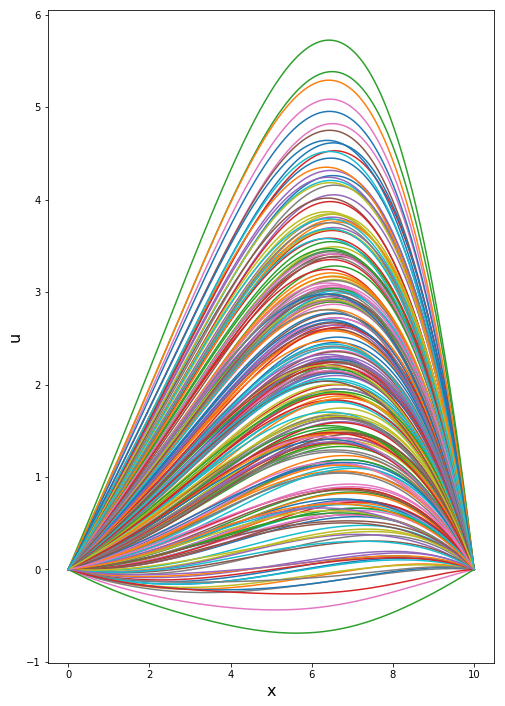

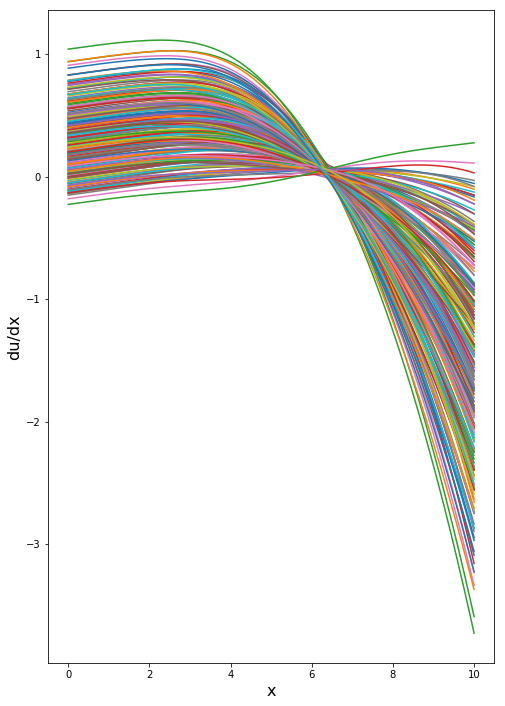

In [6]:
#############################
## Show the generated data ##
#############################

plt.figure(figsize=(8,12))
for sol in ode_sols:
    plt.plot(sol.t, sol.y[0]) # u vs x
plt.ylabel("u", fontsize=16)
plt.xlabel("x", fontsize=16)


plt.figure(figsize=(8,12))
for sol in ode_sols:
    plt.plot(sol.t, sol.y[1]) # du/dx vs x
plt.ylabel("du/dx", fontsize=16)
plt.xlabel("x", fontsize=16)


plt.show()

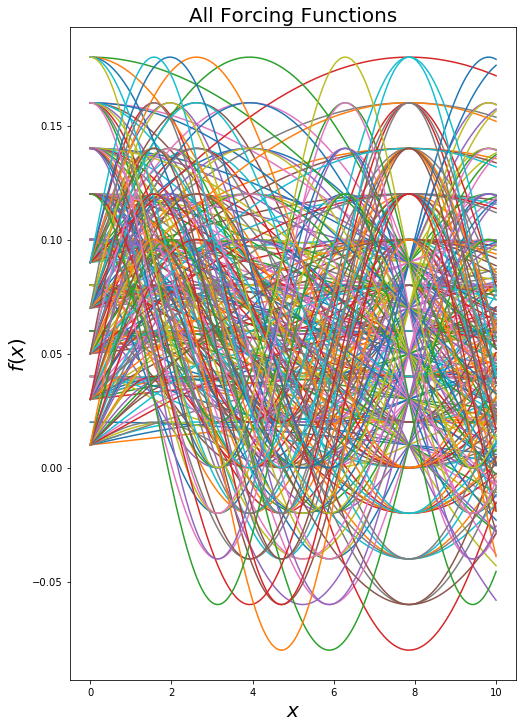

In [7]:
# And forcings
plt.figure(figsize=(8,12))
for f in forcings:
    plt.plot(x_array, f) # du/dx vs x
fs = 20
plt.title("All Forcing Functions", fontsize=fs)
plt.ylabel("$f(x)$", fontsize=fs)
plt.xlabel("$x$", fontsize=fs)
plt.show()